# 2.1 Overview of Statistical Learning - Auto dataset

In [56]:
import pandas as pd 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

!pwd

/Users/el_fer/Repos/ISLP_Applied_Exercises/Chapter 2


From https://islp.readthedocs.io/en/latest/datasets/Auto.html 

- **mpg**: miles per gallon
- **cylinders**: Number of cylinders between 4 and 8
- **displacement**: Engine displacement (cu. inches)
- **horsepower**: Engine horsepower
- **weight**: Vehicle weight (lbs.)
- **acceleration**: Time to accelerate from 0 to 60 mph (sec.)
- **year**: Model year (modulo 100)
- **origin**: Origin of car (1. American, 2. European, 3. Japanese)
- **name**: Vehicle name

9. This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.

### (a) Which of the predictors are quantitative, and which are qualitative?

In [57]:
auto = pd.read_csv('data/Auto.csv')

In [58]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [59]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [60]:
auto['horsepower'] = auto['horsepower'].apply(pd.to_numeric, errors='coerce')

In [61]:
auto[auto['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


In [62]:
auto['cylinders'].value_counts()

4    203
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

##### Qualitative variables: 
- cylinders
- year
- origin
- name
##### Quantitative variables: 
- mpg
- displacement
- horsepower
- weight
- acceleration

### (b) What is the range of each quantitative predictor? You can answer this using the min() and max() methods in numpy.
``
.min()
``

``
.max()
``


In [63]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_predictors = auto.select_dtypes(include=numerics).columns

for predictor in numeric_predictors:
    'Range of {}: [{}, {}]'.format(predictor, auto[predictor].min(), auto[predictor].max())

'Range of mpg: [9.0, 46.6]'

'Range of cylinders: [3, 8]'

'Range of displacement: [68.0, 455.0]'

'Range of horsepower: [46.0, 230.0]'

'Range of weight: [1613, 5140]'

'Range of acceleration: [8.0, 24.8]'

'Range of year: [70, 82]'

'Range of origin: [1, 3]'

### (c) What is the mean and standard deviation of each quantitative predictor?

In [64]:
for predictor in numeric_predictors:
    print(f'{predictor}: [Mean: {auto[predictor].mean():.2f}, Std: {auto[predictor].std():.2f}]')

mpg: [Mean: 23.52, Std: 7.83]
cylinders: [Mean: 5.46, Std: 1.70]
displacement: [Mean: 193.53, Std: 104.38]
horsepower: [Mean: 104.47, Std: 38.49]
weight: [Mean: 2970.26, Std: 847.90]
acceleration: [Mean: 15.56, Std: 2.75]
year: [Mean: 75.99, Std: 3.69]
origin: [Mean: 1.57, Std: 0.80]


### (d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?


In [65]:
auto_d = auto.drop(auto.index[10:85])

for predictor in numeric_predictors:
    print(f'{predictor}: [Mean: {auto_d[predictor].mean():.2f}, Std: {auto_d[predictor].std():.2f}]')

mpg: [Mean: 24.41, Std: 7.91]
cylinders: [Mean: 5.38, Std: 1.66]
displacement: [Mean: 187.68, Std: 100.12]
horsepower: [Mean: 101.24, Std: 36.19]
weight: [Mean: 2936.81, Std: 810.99]
acceleration: [Mean: 15.70, Std: 2.71]
year: [Mean: 77.13, Std: 3.13]
origin: [Mean: 1.60, Std: 0.82]


### (e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.


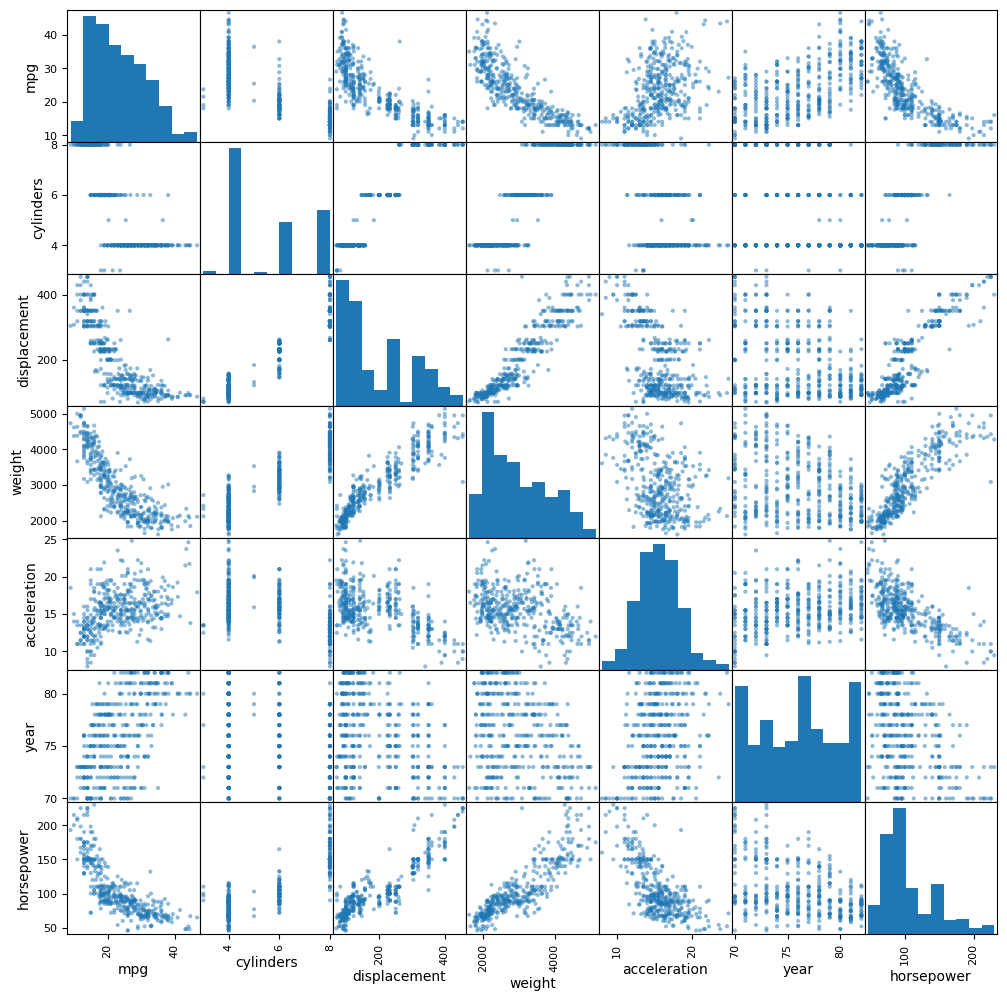

In [67]:
pd.plotting.scatter_matrix(auto[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'horsepower']], figsize=(12,12));

In [68]:
auto['brand'] = [x.split()[0] for x in auto['name']]

In [69]:
auto[['brand', 'name']]

,brand,name
0,chevrolet,chevrolet chevelle malibu
1,buick,buick skylark 320
2,plymouth,plymouth satellite
3,amc,amc rebel sst
4,ford,ford torino
...,...,...
392,ford,ford mustang gl
393,vw,vw pickup
394,dodge,dodge rampage
395,ford,ford ranger


In [45]:
auto['brand'].value_counts()

ford             51
chevrolet        47
plymouth         31
dodge            28
amc              27
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
fiat              8
peugeot           8
audi              7
volvo             6
chrysler          6
renault           5
saab              4
opel              4
subaru            4
mercedes-benz     3
cadillac          2
bmw               2
capri             1
hi                1
triumph           1
nissan            1
Name: brand, dtype: int64

In [48]:
brands_dict = {
    'vw': 'volkswagen'
    ,'vokswagen': 'volkswagen'
    ,'chevy': 'chevrolet'
    ,'maxda': 'mazda'
    ,'mercedes': 'mercedes-benz'
    ,'chevroelt': 'chevrolet'
    ,'toyouta': 'toyota'
    ,'vokswagen': 'volkswagen'
    ,'vokswagen': 'volkswagen'
}

origin_dict = {
    1: 'America'
    ,2: 'Europe'
    ,3: 'Japan'
}

In [79]:
auto['brand'] = auto['brand'].replace(brands_dict)
auto['origin'] = auto['origin'].replace(origin_dict)

In [80]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin           object
name             object
brand            object
dtype: object

In [81]:
auto['brand'] = auto['brand'].astype("category")
auto['origin'] = auto['origin'].astype("category")

In [82]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,America,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,America,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,America,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,America,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,America,ford mustang gl,ford
393,44.0,4,97.0,52.0,2130,24.6,82,Europe,vw pickup,volkswagen
394,32.0,4,135.0,84.0,2295,11.6,82,America,dodge rampage,dodge
395,28.0,4,120.0,79.0,2625,18.6,82,America,ford ranger,ford


In [83]:
auto_america = auto[auto['origin']=='America']
auto_europe = auto[auto['origin']=='Europe']
auto_japan = auto[auto['origin']=='Japan']

auto_japan

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,brand
14,24.0,4,113.0,95.0,2372,15.0,70,Japan,toyota corona mark ii,toyota
18,27.0,4,97.0,88.0,2130,14.5,70,Japan,datsun pl510,datsun
29,27.0,4,97.0,88.0,2130,14.5,71,Japan,datsun pl510,datsun
31,25.0,4,113.0,95.0,2228,14.0,71,Japan,toyota corona,toyota
53,31.0,4,71.0,65.0,1773,19.0,71,Japan,toyota corolla 1200,toyota
...,...,...,...,...,...,...,...,...,...,...
381,34.0,4,108.0,70.0,2245,16.9,82,Japan,toyota corolla,toyota
382,38.0,4,91.0,67.0,1965,15.0,82,Japan,honda civic,honda
383,32.0,4,91.0,67.0,1965,15.7,82,Japan,honda civic (auto),honda
384,38.0,4,91.0,67.0,1995,16.2,82,Japan,datsun 310 gx,datsun


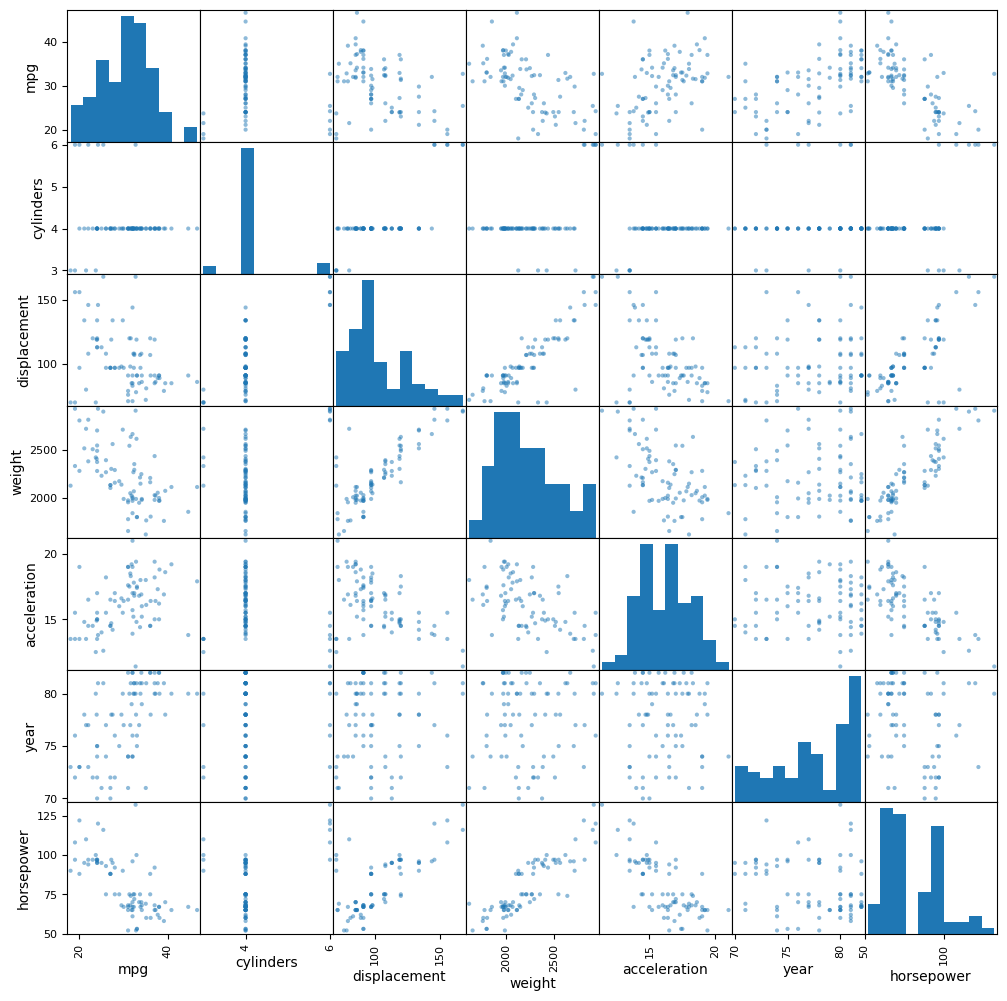

In [84]:
pd.plotting.scatter_matrix(auto_japan[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'horsepower']], figsize=(12,12));

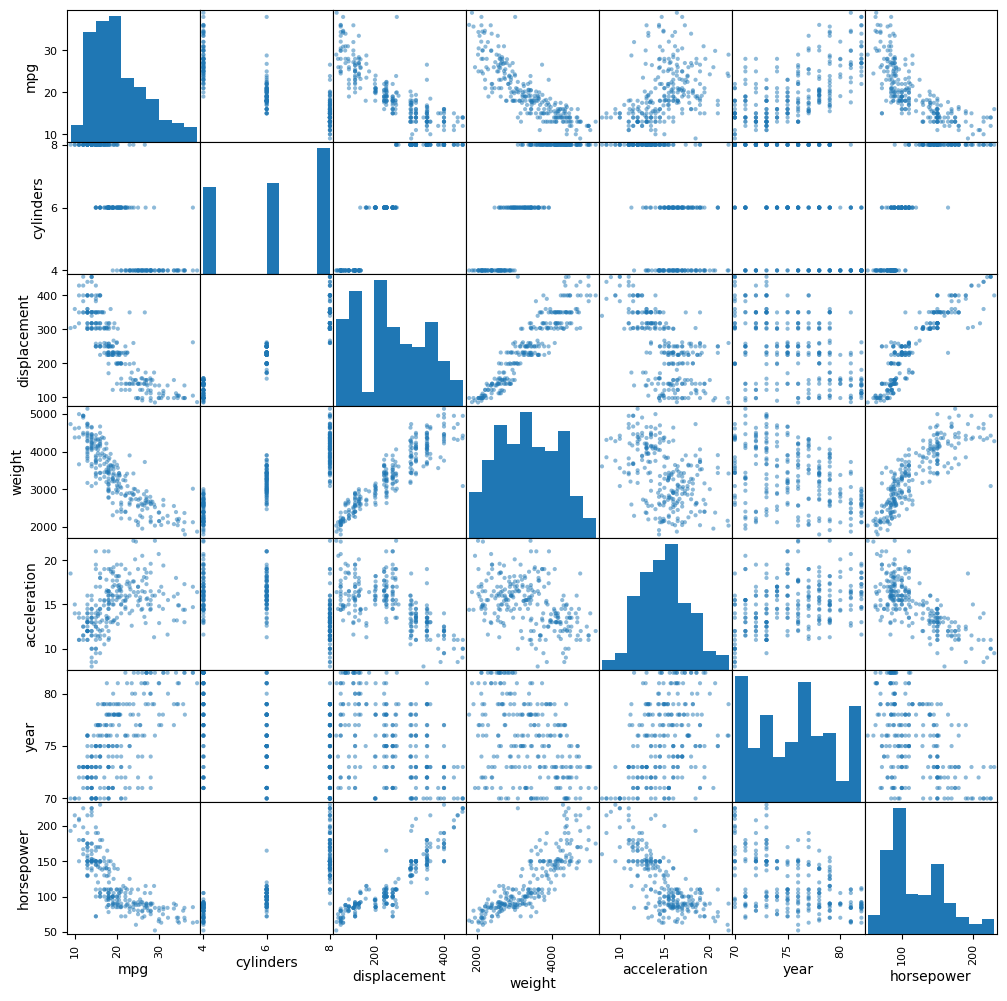

In [85]:
pd.plotting.scatter_matrix(auto_america[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'horsepower']], figsize=(12,12));

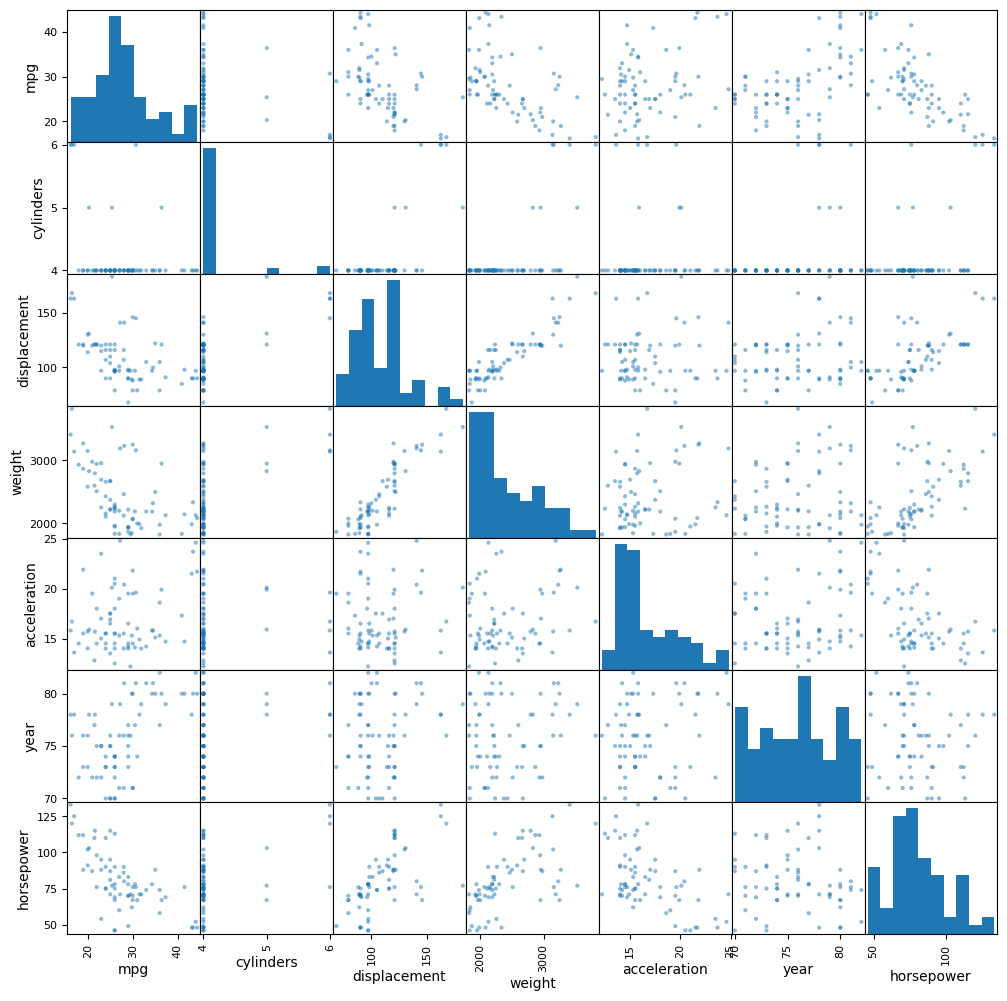

In [86]:
pd.plotting.scatter_matrix(auto_europe[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'horsepower']], figsize=(12,12));

### (f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

cylinders, displacement, weight,year, origin and horsepower.

<Axes: title={'center': 'mpg'}, xlabel='brand'>

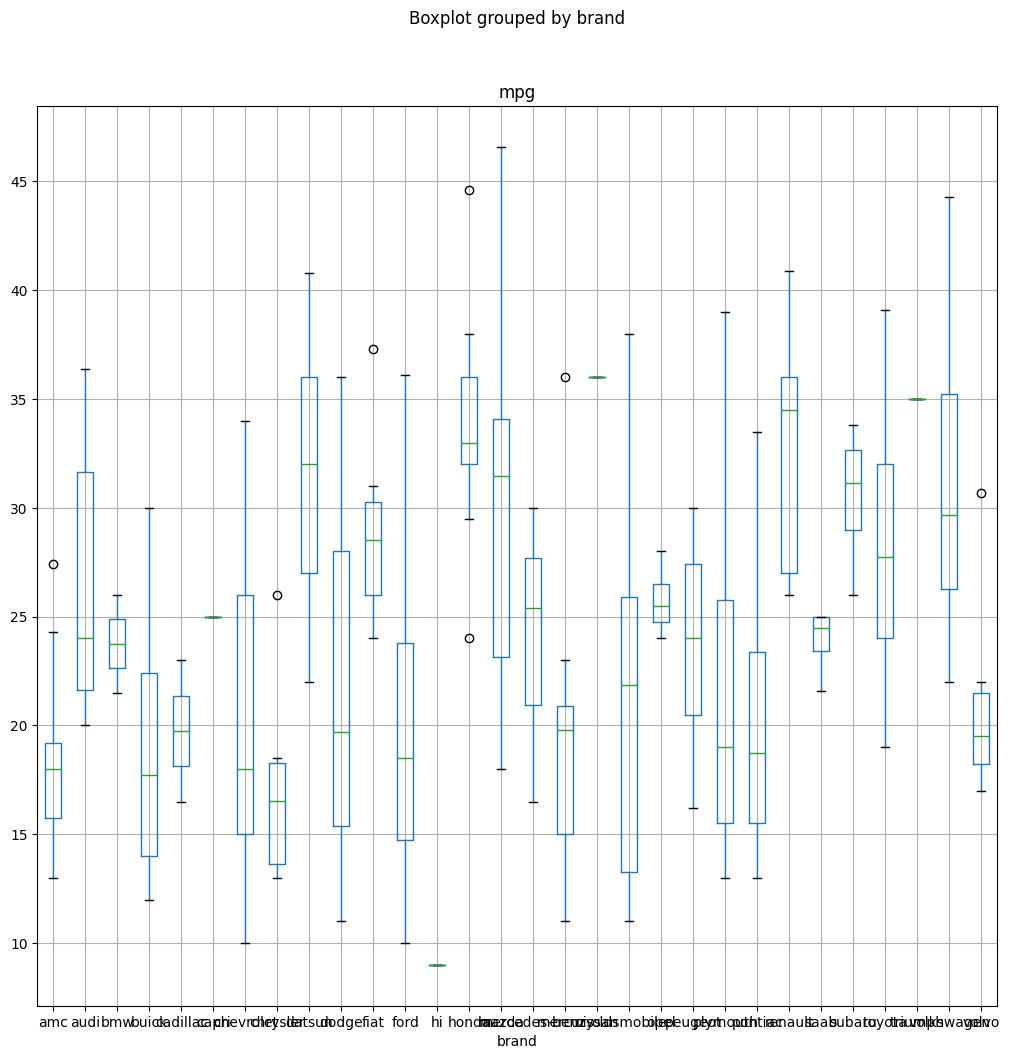

In [88]:
auto.boxplot(column=['mpg'], by='brand', figsize=(12,12))  


In [90]:
import seaborn as sns

<Axes: ylabel='mpg'>

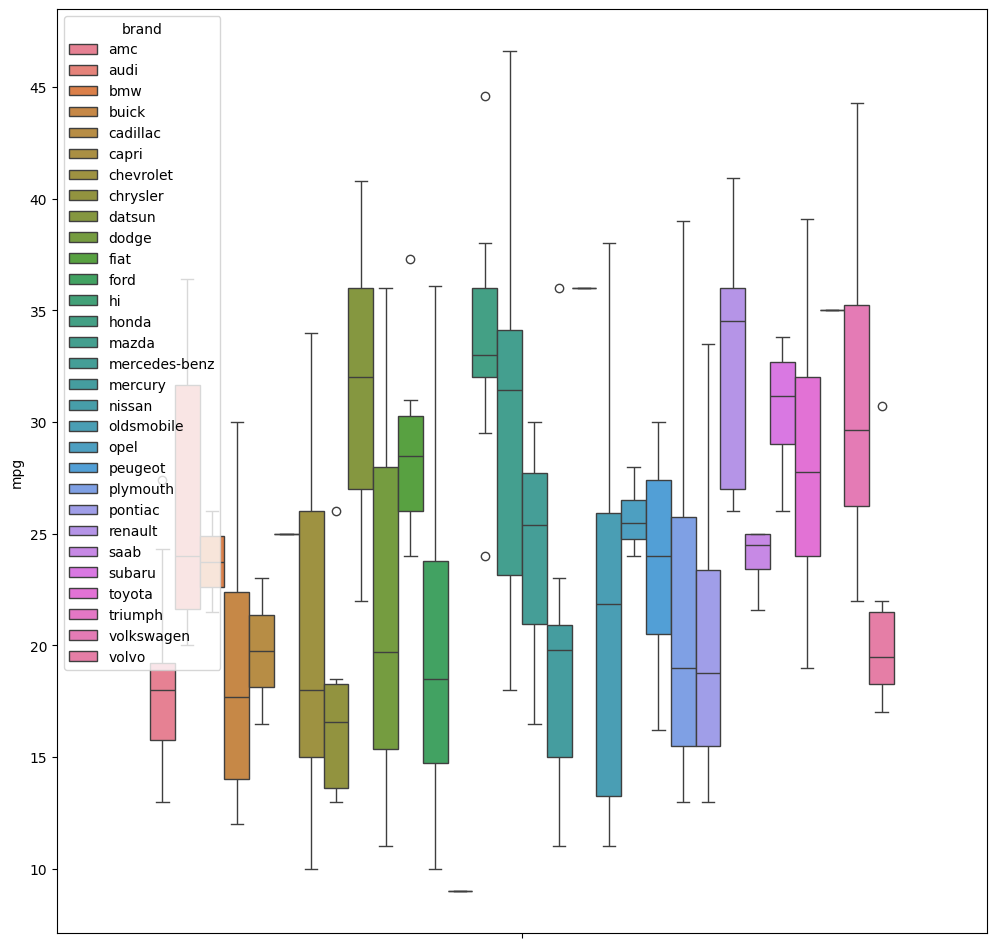

In [95]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(12,12))
sns.boxplot(data=auto, hue='brand', y='mpg', )